In [12]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','P0', 'T0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]','Lr','Lc']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  5)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  10)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  20)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Diluent'] == 'Kr')]

print(len(XpcaFLRDED[( XpcaFLRDED['Fuel'] == 'C2H2') & ( XpcaFLRDED['Diluent'] == 'Ar')]))

dfC2H2N2train = XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'N2')]
dfC2H2N2test = XpcaFLRDED[( XpcaFLRDED['Fuel'] == 'C2H2') & ( XpcaFLRDED['Diluent'] == 'N2')]

dfC2H2Hetrain = dfC2H2N2train[~( dfC2H2N2train['Fuel'] == 'C2H2') | ~( dfC2H2N2train['Diluent'] == 'He')]
dfC2H2Hetest = dfC2H2N2train[( dfC2H2N2train['Fuel'] == 'C2H2') & ( dfC2H2N2train['Diluent'] == 'He')]

dfC2H6N2Otrain =  dfC2H2Hetrain[~( dfC2H2Hetrain['Fuel'] == 'C2H6') | ~( dfC2H2Hetrain['Oxidizer'] == 'N2O')]
dfC2H6N2Otest = dfC2H2Hetrain[( dfC2H2Hetrain['Fuel'] == 'C2H6') & ( dfC2H2Hetrain['Oxidizer'] == 'N2O')]

dfC3H6O2train =  dfC2H6N2Otrain[~( dfC2H6N2Otrain['Fuel'] == 'C3H6') | ~( dfC2H6N2Otrain['Oxidizer'] == 'O2')]
dfC3H6O2test = dfC2H6N2Otrain[( dfC2H6N2Otrain['Fuel'] == 'C3H6') & ( dfC2H6N2Otrain['Oxidizer'] == 'O2')]

dfC3H6N2Otrain =  dfC3H6O2train[~( dfC3H6O2train['Fuel'] == 'C3H6') | ~( dfC3H6O2train['Oxidizer'] == 'N2O')]
dfC3H6N2Otest = dfC3H6O2train[( dfC3H6O2train['Fuel'] == 'C3H6') & ( dfC3H6O2train['Oxidizer'] == 'N2O')]

#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'H2')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'H2')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'H2')]['P0'].min(),'H2')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H2')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent']=='Ar')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent']=='Ar')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H2AR')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H4')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent']=='Ar')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent']=='Ar')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H4AR')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H6')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H6')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H6')]['P0'].min(),'C2H6')

dftrainval = dfC3H6N2Otrain.sample(frac=1)
P0range = '0.6>P0>0.25'
P0range1 = '0.3>P0>0.25'
P0range2 = '0.4>P0>0.25'
P0range3 = '0.6>P0>0.5'
P0range4 = '0.5>P0>0.40'

dfC2H2N2test = dfC2H2N2test.query(P0range)
dfC2H2Hetest = dfC2H2Hetest.query(P0range2)
dfC2H6N2Otest = dfC2H6N2Otest.query(P0range3)
dfC3H6O2test = dfC3H6O2test.query(P0range4)
dfC3H6N2Otest = dfC3H6N2Otest.query(P0range3)

X_train = dftrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc'])
XC2H2N2test = dfC2H2N2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc'])
XC2H2Hetest = dfC2H2Hetest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc'])
XC2H6N2Otest = dfC2H6N2Otest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc'])
XC3H6O2test  = dfC3H6O2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc'])
XC3H6N2Otest  = dfC3H6N2Otest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc'])

y_train = dftrainval['Lr']
yC2H2N2test = dfC2H2N2test['Lr']
yC2H2Hetest = dfC2H2Hetest['Lr']
yC2H6N2Otest = dfC2H6N2Otest['Lr']
yC3H6O2test = dfC3H6O2test['Lr']
yC3H6N2Otest = dfC3H6N2Otest['Lr']

print(len(XC2H2N2test),XC2H2N2test['P0'].max(),XC2H2N2test['P0'].min(),'C2H2N2')
print(len(XC2H2Hetest),XC2H2Hetest['P0'].max(),XC2H2Hetest['P0'].min(),'C2H2He')
print(len(XC2H6N2Otest),XC2H6N2Otest['P0'].max(),XC2H6N2Otest['P0'].min(),'C2H6N2O')
print(len(XC3H6O2test),XC3H6O2test['P0'].max(),XC3H6O2test['P0'].min(),'C3H6O2')
print(len(XC3H6N2Otest),XC3H6N2Otest['P0'].max(),XC3H6N2Otest['P0'].min(),'C3H6N2O')

#print(yC2H2N2test,'C2H2N2')
#print(yC2H2Hetest,'C2H2He')
#print(yC2H6N2Otest,'C2H6N2O')
#print(yC3H6O2test,'C3H6O2')
#print(yC3H6N2Otest,'C3H6N2O')


ss = StandardScaler()
sX_train = ss.fit_transform(X_train)
sX_train = pd.DataFrame(sX_train,columns=X_train.columns)


64
2 0.5997 0.501 C2H2N2
2 0.3045 0.2502 C2H2He
4 0.5853 0.5001 C2H6N2O
3 0.477 0.4365 C3H6O2
2 0.5316 0.5001 C3H6N2O


In [13]:
sol = ['adam']
act = ['relu']
hidd = []

for i in [6]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-4]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
grid1=GridSearchCV(MLPRegressor(), param_grid ,cv=2, n_jobs=4)
grid1.fit(sX_train,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'solver': 'adam'}
Best cross-validation: 0.9355679820650564


In [14]:
X_train = X_train.query(P0range)

sX_train = ss.transform(X_train)
sXC2H2N2test = ss.transform(XC2H2N2test)
sXC2H2Hetest = ss.transform(XC2H2Hetest)
sXC2H6N2Otest = ss.transform(XC2H6N2Otest)
sXC3H6O2test = ss.transform(XC3H6O2test)
sXC3H6N2Otest = ss.transform(XC3H6N2Otest)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


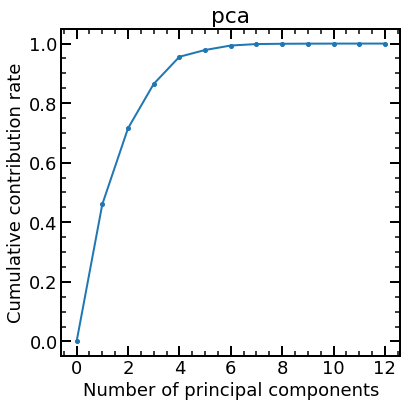

In [25]:
from sklearn.decomposition import PCA,KernelPCA
# データの分布を主成分分析（PCA）で表現してみる
pca = PCA()
#pca  = KernelPCA(n_components=2,  kernel='rbf', gamma=20.0)
X_train_pca = pca.fit_transform(sX_train)
X_testC2H2N2_pca = pca.transform(sXC2H2N2test)
X_testC2H2He_pca = pca.transform(sXC2H2Hetest)
X_testC2H6N2O_pca = pca.transform(sXC2H6N2Otest)
X_testC3H6O2_pca = pca.transform(sXC3H6O2test)
X_testC3H6N2O_pca = pca.transform(sXC3H6N2Otest)

import matplotlib.ticker as ticker
plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.title("pca")
plt.tight_layout()
plt.savefig("gurafu2(研究報告).png")



<Figure size 720x720 with 0 Axes>

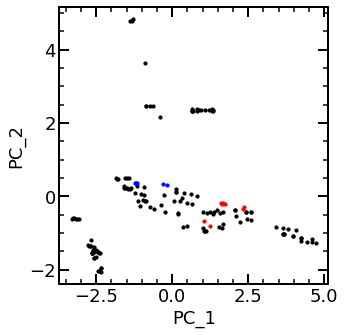

<Figure size 720x720 with 0 Axes>

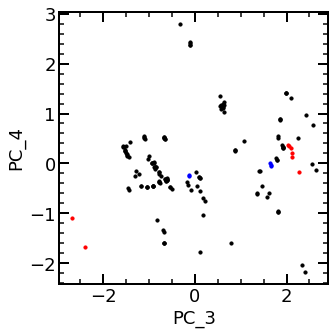

In [24]:
from sklearn.decomposition import PCA
# データの分布を主成分分析（PCA）で表現してみる
pca =  KernelPCA(n_components=4,  kernel='linear')
X_train_pca = pca.fit_transform(sX_train)
X_testC2H2N2_pca = pca.transform(sXC2H2N2test)
X_testC2H2He_pca = pca.transform(sXC2H2Hetest)
X_testC2H6N2O_pca = pca.transform(sXC2H6N2Otest)
X_testC3H6O2_pca = pca.transform(sXC3H6O2test)
X_testC3H6N2O_pca = pca.transform(sXC3H6N2Otest)

from sklearn.svm import OneClassSVM
# One class support vector machine (OCSVM) モデルを構築する
clf = OneClassSVM(nu = 0.1)
y_train_class = clf.fit_predict(X_train_pca)
y_test_classC2H2N2 = clf.predict(X_testC2H2N2_pca)
y_test_classC2H2He = clf.predict(X_testC2H2He_pca)
y_test_classC2H6N2O = clf.predict(X_testC2H6N2O_pca)
y_test_classC3H6O2 = clf.predict(X_testC3H6O2_pca)
y_test_classC3H6N2O = clf.predict(X_testC3H6N2O_pca)
# フォントを変更
plt.rcParams["font.family"] = "Arial"

# Plot のインスタンスと図の大きさを定義
fig = plt.figure(figsize = (10, 10))

# インスタンスの中に複数のグラフを作る場合に指定
# 引数は（行数、列数、具体的に作りたい図のインデックス）
# グラフを 1 つだけ作りたいときは (1, 1, 1)としてやれば良い

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_train_pca[y_train_class == 1, 0], X_train_pca[y_train_class == 1, 1],s=10,color='black')
#plt.scatter(X_train_pca[y_train_class == -1, 0], X_train_pca[y_train_class == -1, 1],s=10,color='grey')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 0], X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 1],s=10,color='blue')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 0], X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 1],s=10,color='red')
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == 1, 0], X_testC2H2He_pca[y_test_classC2H2He == 1, 1],s=10,color='blue')
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == -1, 0], X_testC2H2He_pca[y_test_classC2H2He == -1, 1],s=10,color='red')
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 0], X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 1],s=10,color='blue')
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 0], X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 1],s=10,color='red')
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 0], X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 1],s=10,color='blue')
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 0], X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 1],s=10,color='red')
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 0], X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 1],s=10,color='blue')
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 0], X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 1],s=10,color='red')

plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.tight_layout()
plt.savefig("gurafu1(OCSVM).png")

# Plot のインスタンスと図の大きさを定義
fig = plt.figure(figsize = (10, 10))

# インスタンスの中に複数のグラフを作る場合に指定
# 引数は（行数、列数、具体的に作りたい図のインデックス）
# グラフを 1 つだけ作りたいときは (1, 1, 1)としてやれば良い

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_train_pca[y_train_class == 1, 2], X_train_pca[y_train_class == 1, 3],s=10,color='black')
#plt.scatter(X_train_pca[y_train_class == -1, 2], X_train_pca[y_train_class == -1, 3],s=10,color='grey')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 2], X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 3],s=10,color='blue')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 2], X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 3],s=10,color='red')
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == 1, 2], X_testC2H2He_pca[y_test_classC2H2He == 1, 3],s=10,color='blue')
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == -1, 2], X_testC2H2He_pca[y_test_classC2H2He == -1, 3],s=10,color='red')
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 2], X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 3],s=10,color='blue')
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 2], X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 3],s=10,color='red')
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 2], X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 3],s=10,color='blue')
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 2], X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 3],s=10,color='red')
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 2], X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 3],s=10,color='blue')
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 2], X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 3],s=10,color='red')
plt.xlabel('PC_3')
plt.ylabel('PC_4')
plt.tight_layout()
plt.savefig("gurafu1(OCSVM).png")



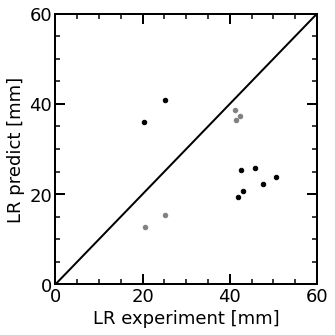

In [ ]:
resultC2H2N2=grid1.predict(sXC2H2N2test)
resultC2H2He=grid1.predict(sXC2H2Hetest)
resultC2H6N2O=grid1.predict(sXC2H6N2Otest)
resultC3H6O2=grid1.predict(sXC3H6O2test)
resultC3H6N2O=grid1.predict(sXC3H6N2Otest)

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H2Hetest[y_test_classC2H2He == 1], resultC2H2He[y_test_classC2H2He == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2Hetest[y_test_classC2H2He == -1], resultC2H2He[y_test_classC2H2He == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H6N2Otest[y_test_classC2H6N2O == 1], resultC2H6N2O[y_test_classC2H6N2O == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H6N2Otest[y_test_classC2H6N2O == -1], resultC2H6N2O[y_test_classC2H6N2O == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == 1], resultC3H6O2[y_test_classC3H6O2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == -1], resultC3H6O2[y_test_classC3H6O2 == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == 1], resultC3H6N2O[y_test_classC3H6N2O == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

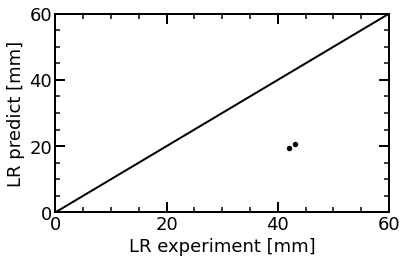

In [ ]:
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == 1], resultC3H6N2O[y_test_classC3H6N2O == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1],s=20,color='black', label = "AD_outside")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

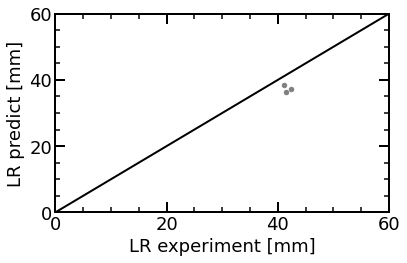

In [ ]:
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == 1], resultC3H6O2[y_test_classC3H6O2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == -1], resultC3H6O2[y_test_classC3H6O2 == -1],s=20,color='black', label = "AD_outside")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

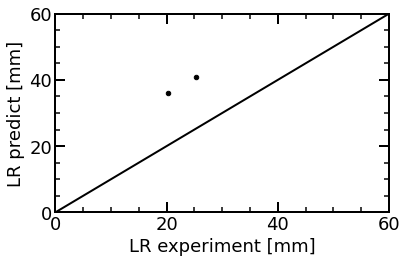

In [ ]:
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H2Hetest[y_test_classC2H2He == 1], resultC2H2He[y_test_classC2H2He == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2Hetest[y_test_classC2H2He == -1], resultC2H2He[y_test_classC2H2He == -1],s=20,color='black', label = "AD_outside")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

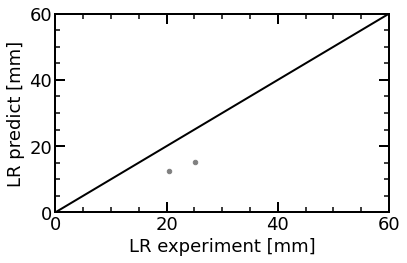

In [ ]:
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1],s=20,color='black', label = "AD_outside")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

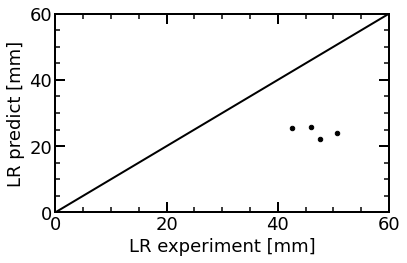

In [ ]:
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H6N2Otest[y_test_classC2H6N2O == 1], resultC2H6N2O[y_test_classC2H6N2O == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H6N2Otest[y_test_classC2H6N2O == -1], resultC2H6N2O[y_test_classC2H6N2O == -1],s=20,color='black', label = "AD_outside")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")